## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error

## Import Dataset

In [2]:
data = pd.read_csv("data.csv")
data

,x,y
0,168.181818,160.840244
1,187.878788,159.413657
2,207.575758,157.136809
3,227.272727,159.357847
4,246.969697,157.542862
...,...,...
89,1921.212121,172.285091
90,1940.909091,176.001331
91,1960.606061,176.128171
92,1980.303030,175.813257


## Data Analysis

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       94 non-null     float64
 1   y       94 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


In [4]:
data.describe()

,x,y
count,94.000000,94.000000
mean,1084.090909,166.576111
std,537.321877,5.861601
min,168.181818,155.234046
25%,626.136364,161.236377
50%,1084.090909,166.508064
75%,1542.045455,171.784967
max,2000.000000,176.361532


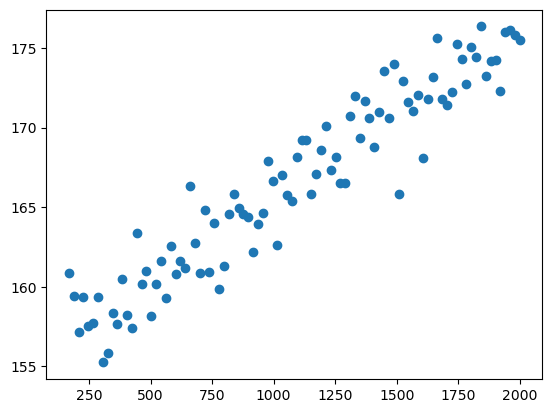

In [5]:
plt.scatter(data["x"],data["y"])

In [6]:
data.isna().sum()

x    0
y    0
dtype: int64

## Split Data into X and Y

In [7]:
x = data.iloc[:,0]
x

0      168.181818
1      187.878788
2      207.575758
3      227.272727
4      246.969697
         ...     
89    1921.212121
90    1940.909091
91    1960.606061
92    1980.303030
93    2000.000000
Name: x, Length: 94, dtype: float64

In [8]:
y = data.iloc[:,1]
y

0     160.840244
1     159.413657
2     157.136809
3     159.357847
4     157.542862
         ...    
89    172.285091
90    176.001331
91    176.128171
92    175.813257
93    175.530826
Name: y, Length: 94, dtype: float64

## Split Data into x_train, x_test, y_train, y_test

In [9]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [10]:
len(x_train),len(x_test),len(y_train),len(y_test)

(75, 19, 75, 19)

In [11]:
x_train = pd.DataFrame(np.reshape(np.array(x_train),(-1,1)))
x_test = pd.DataFrame(np.reshape(np.array(x_test),(-1,1)))

## Training the model

In [12]:
model = SVR()
model.fit(x_train,y_train)

SVR()

In [13]:
model.score(x_test,y_test)

0.7938219946255818

In [14]:
ypreds = model.predict(x_test)
ypreds

array([165.80493424, 159.42401407, 159.53633893, 169.40023937,
       169.84476323, 162.6035721 , 167.153441  , 168.50216399,
       165.57899253, 173.22277879, 159.73693786, 166.70463498,
       165.3524682 , 160.39009094, 172.78776173, 171.32336876,
       161.51067671, 169.62312655, 164.21006723])

In [15]:
r2_score(y_test,ypreds)

0.7938219946255818

In [16]:
mean_absolute_error(y_test,ypreds)

1.883087667926171

In [17]:
mean_squared_error(y_test,ypreds)

4.909452208837557